In [4]:
import pandas as pd
import pickle as pickle
import pathlib

In [7]:
PATH = pathlib.Path().absolute().parent
DATA_PATH = PATH.joinpath("saved_models").resolve()

# 0 Model Architectures

In [64]:
experiments0 = ["MOBILENET_PT=False_BS=128_FAT=True",
                "SHUFFLENET_PT=False_BS=128_FAT=True",
                "WIDERESNET_PT=False_BS=128_FAT=True",
                "RESNET101_PT=False_BS=128_FAT=True",
               ]
experiment_names0 = ["MobileNet", "ShuffleNet", "WideResNet50", "ResNet101"]

In [65]:
df0 = pd.DataFrame()
for i, e in enumerate(experiments0):
    with DATA_PATH.joinpath(e).joinpath("metrics.pkl").open("rb") as f:
        dfm = pd.DataFrame(pickle.load(f))
        for col in dfm.columns:
            df0[f"{i}_{col}"] = dfm[col]

In [66]:
df0

,0_train_a,0_train_loss,0_eval_a,0_eval_loss,0_train_0_a,0_train_0_p,0_train_0_r,0_train_0_f,0_eval_0_a,0_eval_0_p,...,3_eval_9_r,3_eval_9_f,3_train_9_tp,3_train_9_tn,3_train_9_fp,3_train_9_fn,3_eval_9_tp,3_eval_9_tn,3_eval_9_fp,3_eval_9_fn
0,0.248106,1.921712,0.265347,1.910447,0.998545,0.0,0.0,0.0,0.99802,0.0,...,0.362963,0.308176,9234.0,12723.0,23455.0,4083.0,49.0,236.0,134.0,86.0
1,0.258107,1.899726,0.267327,1.905561,0.999172,0.0,0.0,0.0,0.99802,0.0,...,0.607407,0.614232,8405.0,20407.0,15771.0,4912.0,82.0,320.0,50.0,53.0
2,0.265764,1.887536,0.241584,1.978717,0.999172,0.0,0.0,0.0,0.99802,0.0,...,0.844444,0.894118,9692.0,32661.0,3517.0,3625.0,114.0,364.0,6.0,21.0
3,0.323265,1.808574,0.330693,1.765591,0.999172,0.0,0.0,0.0,0.99802,0.0,...,0.918519,0.942966,10793.0,34478.0,1700.0,2524.0,124.0,366.0,4.0,11.0
4,0.432933,1.596199,0.435644,2.146250,0.999172,0.0,0.0,0.0,0.99802,0.0,...,0.933333,0.954545,11176.0,34831.0,1347.0,2141.0,126.0,367.0,3.0,9.0
5,0.632690,1.086469,0.788119,0.668019,0.999172,0.0,0.0,0.0,0.99802,0.0,...,0.888889,0.933852,11400.0,35009.0,1169.0,1917.0,120.0,368.0,2.0,15.0
6,0.727912,0.829906,0.801980,0.635521,0.999172,0.0,0.0,0.0,0.99802,0.0,...,0.977778,0.963504,11532.0,35055.0,1123.0,1785.0,132.0,363.0,7.0,3.0
7,0.789635,0.651766,0.916832,0.262825,0.999172,0.0,0.0,0.0,0.99802,0.0,...,0.970370,0.981273,11916.0,35305.0,873.0,1401.0,131.0,369.0,1.0,4.0
8,0.803475,0.604422,0.920792,0.234423,0.999172,0.0,0.0,0.0,0.99802,0.0,...,0.977778,0.981413,12032.0,35358.0,820.0,1285.0,132.0,368.0,2.0,3.0
9,0.809759,0.581902,0.924752,0.214774,0.999172,0.0,0.0,0.0,0.99802,0.0,...,0.977778,0.985075,12056.0,35353.0,825.0,1261.0,132.0,369.0,1.0,3.0


# Plotting

## Training and validation loss

All resnet models seem to converge after 7 epochs, regardless of model size.  
The larger the model, the better the validation loss.

Text(0, 0.5, 'Validation Loss')

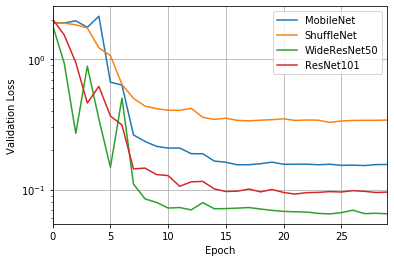

In [68]:
ax = plot_metric(df0, "eval_loss", experiment_names0, 
                 plot_kwargs=dict(logy=True, grid=True))
ax.set_xlabel("Epoch")
ax.set_ylabel("Validation Loss")

Clear overfitting after 7th epoch.  
Interestingly, smaller model seems more prone to overfitting.

Text(0, 0.5, 'Training Loss')

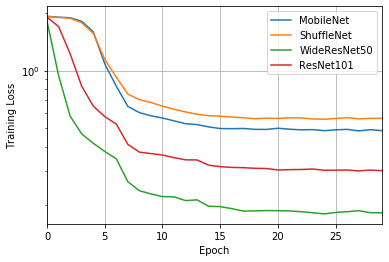

In [69]:
ax = plot_metric(df0, "train_loss", experiment_names0, 
                 plot_kwargs=dict(logy=True, grid=True))
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Loss")

## End results after convergence

In [72]:
best_epochs0 = []
eval_accuracies0 = pd.DataFrame()
for i,e in enumerate(experiment_names0):
    idx_max = df0[f"{i}_eval_a"].idxmax()
    best_epochs0.append(idx_max)
    eval_accuracies0[e] = [df0[f"{i}_eval_a"][idx_max]]
eval_accuracies0

,MobileNet,ShuffleNet,WideResNet50,ResNet101
0,0.950495,0.893069,0.980198,0.978218


In [73]:
columns0 = []
for i,e in enumerate(experiment_names0):
    for m, metric_name in zip(["p", "r", "f"], ["precision", "recall", "f1-score"]):
        columns0.append((e, metric_name))
        
mi_columns0 = pd.MultiIndex.from_tuples(columns0, names=['model', 'Metric'])
eval_class_prf0 = pd.DataFrame(columns=mi_columns0)
for i,e in enumerate(experiment_names0):
    for m, metric_name in zip(["p", "r", "f"], ["precision", "recall", "f1-score"]):
        eval_class_prf0[e, metric_name] = [df0[f"{i}_eval_{digit}_{m}"][best_epochs0[i]] for digit in range(10)]
eval_class_prf0
    

model  MobileNet                     ShuffleNet                      \
Metric precision    recall  f1-score  precision    recall  f1-score   
0       0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
1       0.800000  0.800000  0.800000   1.000000  0.800000  0.888889   
2       0.750000  0.818182  0.782609   0.500000  0.272727  0.352941   
3       0.850000  0.850000  0.850000   0.576923  0.750000  0.652174   
4       0.937500  0.937500  0.937500   0.848485  0.875000  0.861538   
5       0.926829  0.883721  0.904762   0.923077  0.837209  0.878049   
6       0.967742  0.967742  0.967742   0.950820  0.935484  0.943089   
7       0.988372  0.955056  0.971429   0.951807  0.887640  0.918605   
8       0.946429  0.990654  0.968037   0.880342  0.962617  0.919643   
9       0.970370  0.970370  0.970370   0.919118  0.925926  0.922509   

model  WideResNet50                     ResNet101                      
Metric    precision    recall  f1-score precision    recall  f1-score  
0          1.000000  1.000000  1.000000  0.000000  0.000000  0.000000  
1          1.000000  1.000000  1.000000  0.833333  1.000000  0.909091  
2          1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
3          0.950000  0.950000  0.950000  1.000000  1.000000  1.000000  
4          0.939394  0.968750  0.953846  0.939394  0.968750  0.953846  
5          0.954545  0.976744  0.965517  0.976744  0.976744  0.976744  
6          1.000000  1.000000  1.000000  0.983607  0.967742  0.975610  
7          0.967033  0.988764  0.977778  0.988764  0.988764  0.988764  
8          0.981132  0.971963  0.976526  0.963303  0.981308  0.972222  
9          1.000000  0.977778  0.988764  0.992481  0.977778  0.985075

# 1 Model size

In [48]:
experiments1 = ["RESNET18_PT=False", "RESNET50_PT=False", "RESNET101_PT=False"]
experiment_names1 = ["ResNet18", "ResNet50", "ResNet101"]

In [49]:
df1 = pd.DataFrame()
for i, e in enumerate(experiments1):
    with DATA_PATH.joinpath(e).joinpath("metrics.pkl").open("rb") as f:
        dfm = pd.DataFrame(pickle.load(f))
        for col in dfm.columns:
            df1[f"{i}_{col}"] = dfm[col]

In [42]:
df1

,0_train_a,0_train_loss,0_eval_a,0_eval_loss,0_train_0_a,0_train_0_p,0_train_0_r,0_train_0_f,0_eval_0_a,0_eval_0_p,...,2_eval_9_r,2_eval_9_f,2_train_9_tp,2_train_9_tn,2_train_9_fp,2_train_9_fn,2_eval_9_tp,2_eval_9_tn,2_eval_9_fp,2_eval_9_fn
0,0.432734,1.557306,0.525464,1.699984,0.999178,0.0,0.000000,0.000000,0.999001,0.000000,...,0.864042,0.726875,7648.0,17864.0,15023.0,4458.0,1163.0,2970.0,691.0,183.0
1,0.784522,0.633409,0.709407,0.856572,0.999178,0.0,0.000000,0.000000,0.999001,0.000000,...,0.605498,0.741246,10521.0,31333.0,1554.0,1585.0,815.0,3623.0,38.0,531.0
2,0.891428,0.335301,0.797683,0.686825,0.999178,0.0,0.000000,0.000000,0.999001,0.000000,...,0.701337,0.823735,11172.0,32172.0,715.0,934.0,944.0,3659.0,2.0,402.0
3,0.929811,0.222437,0.903535,0.308750,0.999178,0.0,0.000000,0.000000,0.999001,0.000000,...,0.884101,0.934433,11406.0,32365.0,522.0,700.0,1190.0,3650.0,11.0,156.0
4,0.948636,0.166778,0.838027,0.522424,0.999178,0.0,0.000000,0.000000,0.999001,0.000000,...,0.942051,0.940304,11534.0,32474.0,413.0,572.0,1268.0,3578.0,83.0,78.0
5,0.961883,0.124691,0.864390,0.464903,0.999178,0.0,0.000000,0.000000,0.999001,0.000000,...,0.916048,0.948097,11642.0,32527.0,360.0,464.0,1233.0,3639.0,22.0,113.0
6,0.970595,0.095955,0.885760,0.418004,0.999155,0.0,0.000000,0.000000,0.999001,0.000000,...,0.903418,0.941541,11664.0,32560.0,327.0,442.0,1216.0,3640.0,21.0,130.0
7,0.989221,0.039176,0.961853,0.136100,0.999178,0.0,0.000000,0.000000,0.999001,0.000000,...,0.980684,0.975249,11897.0,32746.0,141.0,209.0,1320.0,3620.0,41.0,26.0
8,0.994177,0.024138,0.961654,0.134390,0.999200,1.0,0.027027,0.052632,0.999001,0.000000,...,0.974740,0.978010,11972.0,32786.0,101.0,134.0,1312.0,3636.0,25.0,34.0
9,0.995777,0.017892,0.961055,0.135681,0.999200,1.0,0.027027,0.052632,0.999001,0.000000,...,0.973254,0.978708,11992.0,32808.0,79.0,114.0,1310.0,3640.0,21.0,36.0


In [43]:
def plot_metric(df, metric, experiment_names, plot_kwargs={}):
    columns = [f"{i}_{metric}" for i,_ in enumerate(experiment_names)]
    plot_df = pd.DataFrame()
    for i, col in enumerate(columns):
        plot_df[experiment_names[i]] = df[col]
    return plot_df.plot(**plot_kwargs)

## Training and validation loss

All resnet models seem to converge after 7 epochs, regardless of model size.  
The larger the model, the better the validation loss.

Text(0, 0.5, 'Validation Loss')

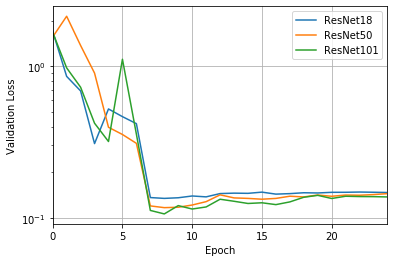

In [50]:
ax = plot_metric(df1, "eval_loss", experiment_names1, 
                 plot_kwargs=dict(logy=True, grid=True))
ax.set_xlabel("Epoch")
ax.set_ylabel("Validation Loss")

Clear overfitting after 7th epoch.  
Interestingly, smaller model seems more prone to overfitting.

Text(0, 0.5, 'Training Loss')

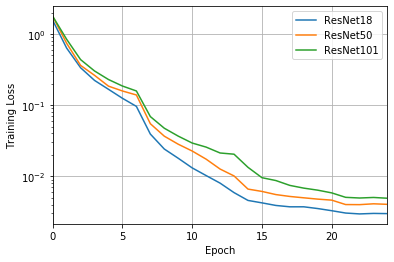

In [51]:
ax = plot_metric(df1, "train_loss", experiment_names1, 
                 plot_kwargs=dict(logy=True, grid=True))
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Loss")

## End results after convergence

In [47]:
best_epochs1 = []
eval_accuracies1 = pd.DataFrame()
for i,e in enumerate(experiment_names1):
    idx_max = df1[f"{i}_eval_a"].idxmax()
    best_epochs1.append(idx_max)
    eval_accuracies1[e] = [df1[f"{i}_eval_a"][idx_max]]
eval_accuracies1

,ResNet18,ResNet50,ResNet101
0,0.96405,0.969842,0.974036


In [62]:
columns1 = []
for i,e in enumerate(experiment_names1):
    for m, metric_name in zip(["p", "r", "f"], ["precision", "recall", "f1-score"]):
        columns1.append((e, metric_name))
        
mi_columns1 = pd.MultiIndex.from_tuples(columns1, names=['model', 'Metric'])
eval_class_prf1 = pd.DataFrame(columns=mi_columns1)
for i,e in enumerate(experiment_names1):
#     eval_class_prf[e] = pd.DataFrame()
    for m, metric_name in zip(["p", "r", "f"], ["precision", "recall", "f1-score"]):
        eval_class_prf1[e, metric_name] = [df1[f"{i}_eval_{digit}_{m}"][best_epochs1[i]] for digit in range(10)]
eval_class_prf1      
    

model   ResNet18                      ResNet50                     ResNet101  \
Metric precision    recall  f1-score precision    recall  f1-score precision   
0       1.000000  0.400000  0.571429  1.000000  0.400000  0.571429  1.000000   
1       0.891304  0.953488  0.921348  0.930233  0.930233  0.930233  0.955556   
2       0.901961  0.893204  0.897561  0.932039  0.932039  0.932039  0.925234   
3       0.944162  0.930000  0.937028  0.935644  0.945000  0.940299  0.974227   
4       0.938080  0.952830  0.945398  0.947531  0.965409  0.956386  0.950311   
5       0.957346  0.955083  0.956213  0.957944  0.969267  0.963572  0.966825   
6       0.955272  0.966074  0.960643  0.972222  0.961228  0.966694  0.974235   
7       0.961451  0.956032  0.958734  0.972789  0.967306  0.970040  0.975169   
8       0.978261  0.973659  0.975955  0.976548  0.979304  0.977924  0.983871   
9       0.977020  0.979198  0.978108  0.979926  0.979198  0.979562  0.977811   

model                       
Metric    recall  f1-score  
0       0.800000  0.888889  
1       1.000000  0.977273  
2       0.961165  0.942857  
3       0.945000  0.959391  
4       0.962264  0.956250  
5       0.964539  0.965680  
6       0.977383  0.975806  
7       0.974070  0.974619  
8       0.975541  0.979688  
9       0.982169  0.979985

# 2 Data Augmentation

In [78]:
experiments2 = ["RESNET18_PT=False_BS=256_FAT=False", "RESNET18_PT=False_BS=256_FAT=True"]
experiment_names2 = ["No Transform", "Transforms"]

In [56]:
df2 = pd.DataFrame()
for i, e in enumerate(experiments2):
    with DATA_PATH.joinpath(e).joinpath("metrics.pkl").open("rb") as f:
        dfm = pd.DataFrame(pickle.load(f))
        for col in dfm.columns:
            df2[f"{i}_{col}"] = dfm[col]

In [57]:
df2

,0_train_a,0_train_loss,0_eval_a,0_eval_loss,0_train_0_a,0_train_0_p,0_train_0_r,0_train_0_f,0_eval_0_a,0_eval_0_p,...,1_eval_9_r,1_eval_9_f,1_train_9_tp,1_train_9_tn,1_train_9_fp,1_train_9_fn,1_eval_9_tp,1_eval_9_tn,1_eval_9_fp,1_eval_9_fn
0,0.380192,1.670742,0.257240,5.816684,0.995999,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.586181,0.552521,7264.0,16757.0,16130.0,4842.0,789.0,2940.0,721.0,557.0
1,0.768186,0.685417,0.598362,1.571442,0.999178,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.966568,0.724589,9362.0,30328.0,2559.0,2744.0,1301.0,2717.0,944.0,45.0
2,0.890383,0.343521,0.637108,1.269240,0.999178,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.913819,0.930760,10239.0,31614.0,1273.0,1867.0,1230.0,3594.0,67.0,116.0
3,0.926766,0.231691,0.913321,0.278583,0.999178,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.876672,0.925853,10645.0,31843.0,1044.0,1461.0,1180.0,3638.0,23.0,166.0
4,0.949903,0.163083,0.697224,1.515459,0.999178,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.969539,0.958502,10792.0,32021.0,866.0,1314.0,1305.0,3589.0,72.0,41.0
5,0.960238,0.131581,0.822648,0.680971,0.999178,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.941308,0.959848,10855.0,32109.0,778.0,1251.0,1267.0,3634.0,27.0,79.0
6,0.966061,0.108526,0.830837,0.602378,0.999178,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.976226,0.972613,10951.0,32135.0,752.0,1155.0,1314.0,3619.0,42.0,32.0
7,0.987176,0.044959,0.961055,0.132346,0.999178,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.982912,0.985108,11196.0,32251.0,636.0,910.0,1323.0,3644.0,17.0,23.0
8,0.993154,0.027494,0.962053,0.128874,0.999178,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.983655,0.982925,11231.0,32276.0,611.0,875.0,1324.0,3637.0,24.0,22.0
9,0.995355,0.020580,0.962652,0.129714,0.999178,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.985884,0.986617,11263.0,32326.0,561.0,843.0,1327.0,3644.0,17.0,19.0


# Plotting

## Training and validation loss

All resnet models seem to converge after 7 epochs, regardless of model size.  
The larger the model, the better the validation loss.

Text(0, 0.5, 'Validation Loss')

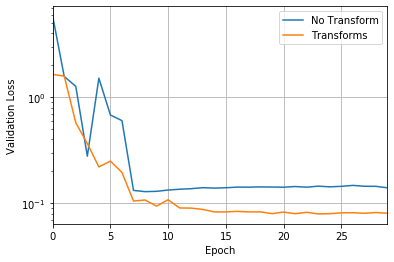

In [59]:
ax = plot_metric(df2, "eval_loss", experiment_names2, 
                 plot_kwargs=dict(logy=True, grid=True))
ax.set_xlabel("Epoch")
ax.set_ylabel("Validation Loss")

Clear overfitting after 7th epoch.  
Interestingly, smaller model seems more prone to overfitting.

Text(0, 0.5, 'Training Loss')

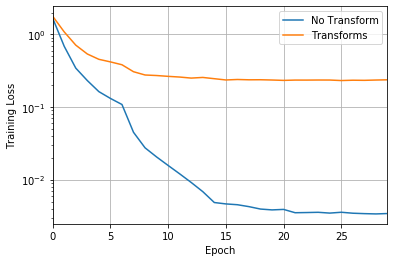

In [60]:
ax = plot_metric(df2, "train_loss", experiment_names2, 
                 plot_kwargs=dict(logy=True, grid=True))
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Loss")

## End results after convergence

In [74]:
best_epochs2 = []
eval_accuracies2 = pd.DataFrame()
for i,e in enumerate(experiment_names2):
    idx_max = df2[f"{i}_eval_a"].idxmax()
    best_epochs2.append(idx_max)
    eval_accuracies2[e] = [df2[f"{i}_eval_a"][idx_max]]
eval_accuracies2

,No Transform,Transforms
0,0.967446,0.975634


In [75]:
columns2 = []
for i,e in enumerate(experiment_names2):
    for m, metric_name in zip(["p", "r", "f"], ["precision", "recall", "f1-score"]):
        columns2.append((e, metric_name))
        
mi_columns2 = pd.MultiIndex.from_tuples(columns2, names=['model', 'Metric'])
eval_class_prf2 = pd.DataFrame(columns=mi_columns2)
for i,e in enumerate(experiment_names2):
#     eval_class_prf[e] = pd.DataFrame()
    for m, metric_name in zip(["p", "r", "f"], ["precision", "recall", "f1-score"]):
        eval_class_prf2[e, metric_name] = [df2[f"{i}_eval_{digit}_{m}"][best_epochs2[i]] for digit in range(10)]
eval_class_prf2
    

model  No Transform                     Transforms                    
Metric    precision    recall  f1-score  precision    recall  f1-score
0          0.600000  0.600000  0.600000   0.000000  0.000000  0.000000
1          0.893617  0.976744  0.933333   0.857143  0.976744  0.913043
2          0.899083  0.951456  0.924528   0.902655  0.990291  0.944444
3          0.963918  0.935000  0.949239   0.965000  0.965000  0.965000
4          0.948328  0.981132  0.964451   0.948171  0.977987  0.962848
5          0.956627  0.938534  0.947494   0.962353  0.966903  0.964623
6          0.960317  0.977383  0.968775   0.969745  0.983845  0.976744
7          0.961926  0.968433  0.965169   0.977273  0.969560  0.973401
8          0.985673  0.970837  0.978199   0.990467  0.977422  0.983902
9          0.978326  0.972511  0.975410   0.988764  0.980684  0.984707

# 3 Image Size

In [107]:
experiments3 = ["RESNET18_PT=False_BS=256_FAT=True_IRS=64", "RESNET18_PT=False_BS=256_FAT=True", "RESNET18_PT=False_BS=256_FAT=True_IRS=256"]
experiment_names3 = ["64x64", "128x128", "256x256"]

In [99]:
df3 = pd.DataFrame()
for i, e in enumerate(experiments3):
    with DATA_PATH.joinpath(e).joinpath("metrics.pkl").open("rb") as f:
        dfm = pd.DataFrame(pickle.load(f))
        for col in dfm.columns:
            df3[f"{i}_{col}"] = dfm[col]

In [100]:
df3

,0_train_a,0_train_loss,0_eval_a,0_eval_loss,0_train_0_a,0_train_0_p,0_train_0_r,0_train_0_f,0_eval_0_a,0_eval_0_p,...,2_eval_9_r,2_eval_9_f,2_train_9_tp,2_train_9_tn,2_train_9_fp,2_train_9_fn,2_eval_9_tp,2_eval_9_tn,2_eval_9_fp,2_eval_9_fn
0,0.261907,1.907480,0.179948,1.966843,0.999178,0.0,0.0,0.0,0.999001,0.0,...,0.543834,0.635141,8126.0,20870.0,12017.0,3980.0,732.0,3434.0,227.0,614.0
1,0.291356,1.817203,0.329339,1.779864,0.999178,0.0,0.0,0.0,0.999001,0.0,...,0.861813,0.914106,10274.0,31659.0,1228.0,1832.0,1160.0,3629.0,32.0,186.0
2,0.330585,1.732466,0.366087,1.696410,0.999178,0.0,0.0,0.0,0.999001,0.0,...,0.794205,0.882013,10695.0,32048.0,839.0,1411.0,1069.0,3652.0,9.0,277.0
3,0.417132,1.558859,0.432994,1.558986,0.999178,0.0,0.0,0.0,0.999001,0.0,...,0.692422,0.816112,10927.0,32213.0,674.0,1179.0,932.0,3655.0,6.0,414.0
4,0.572622,1.209250,0.646295,0.996266,0.999178,0.0,0.0,0.0,0.999001,0.0,...,0.971768,0.977578,11033.0,32251.0,636.0,1073.0,1308.0,3639.0,22.0,38.0
5,0.646234,1.012664,0.709407,0.826417,0.999178,0.0,0.0,0.0,0.999001,0.0,...,0.983655,0.977482,11106.0,32339.0,548.0,1000.0,1324.0,3622.0,39.0,22.0
6,0.692352,0.894076,0.786898,0.667308,0.999178,0.0,0.0,0.0,0.999001,0.0,...,0.896731,0.933488,11209.0,32348.0,539.0,897.0,1207.0,3628.0,33.0,139.0
7,0.742560,0.749514,0.853605,0.435330,0.999178,0.0,0.0,0.0,0.999001,0.0,...,0.986627,0.986261,11385.0,32503.0,384.0,721.0,1328.0,3642.0,19.0,18.0
8,0.754095,0.722406,0.861993,0.411341,0.999178,0.0,0.0,0.0,0.999001,0.0,...,0.983655,0.986220,11439.0,32537.0,350.0,667.0,1324.0,3646.0,15.0,22.0
9,0.761941,0.688441,0.867186,0.394866,0.999178,0.0,0.0,0.0,0.999001,0.0,...,0.988856,0.987389,11468.0,32512.0,375.0,638.0,1331.0,3642.0,19.0,15.0


# Plotting

## Training and validation loss

All resnet models seem to converge after 7 epochs, regardless of model size.  
The larger the model, the better the validation loss.

Text(0, 0.5, 'Validation Loss')

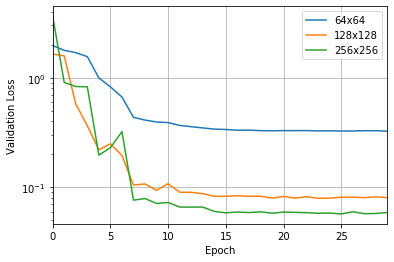

In [101]:
ax = plot_metric(df3, "eval_loss", experiment_names3, 
                 plot_kwargs=dict(logy=True, grid=True))
ax.set_xlabel("Epoch")
ax.set_ylabel("Validation Loss")

Clear overfitting after 7th epoch.  
Interestingly, smaller model seems more prone to overfitting.

Text(0, 0.5, 'Training Loss')

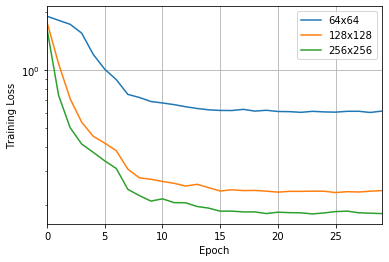

In [102]:
ax = plot_metric(df3, "train_loss", experiment_names3, 
                 plot_kwargs=dict(logy=True, grid=True))
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Loss")

## End results after convergence

In [103]:
best_epochs3 = []
eval_accuracies3 = pd.DataFrame()
for i,e in enumerate(experiment_names3):
    idx_max = df3[f"{i}_eval_a"].idxmax()
    best_epochs3.append(idx_max)
    eval_accuracies3[e] = [df3[f"{i}_eval_a"][idx_max]]
eval_accuracies3

,64x64,128x128,256x256
0,0.894148,0.975634,0.98542


In [104]:
columns3 = []
for i,e in enumerate(experiment_names3):
    for m, metric_name in zip(["p", "r", "f"], ["precision", "recall", "f1-score"]):
        columns3.append((e, metric_name))
        
mi_columns3 = pd.MultiIndex.from_tuples(columns3, names=['model', 'Metric'])
eval_class_prf3 = pd.DataFrame(columns=mi_columns3)
for i,e in enumerate(experiment_names3):
    for m, metric_name in zip(["p", "r", "f"], ["precision", "recall", "f1-score"]):
        eval_class_prf3[e, metric_name] = [df3[f"{i}_eval_{digit}_{m}"][best_epochs3[i]] for digit in range(10)]
eval_class_prf3
    

model      64x64                       128x128                       256x256  \
Metric precision    recall  f1-score precision    recall  f1-score precision   
0       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.750000   
1       0.733333  0.255814  0.379310  0.857143  0.976744  0.913043  0.955556   
2       0.540816  0.514563  0.527363  0.902655  0.990291  0.944444  0.944444   
3       0.677824  0.810000  0.738041  0.965000  0.965000  0.965000  0.960784   
4       0.841463  0.867925  0.854489  0.948171  0.977987  0.962848  0.975078   
5       0.865707  0.853428  0.859524  0.962353  0.966903  0.964623  0.980952   
6       0.917763  0.901454  0.909535  0.969745  0.983845  0.976744  0.983871   
7       0.894505  0.917700  0.905954  0.977273  0.969560  0.973401  0.989831   
8       0.924299  0.930386  0.927332  0.990467  0.977422  0.983902  0.994313   
9       0.947806  0.930906  0.939280  0.988764  0.980684  0.984707  0.988848   

model                       
Metric    recall  f1-score  
0       0.600000  0.666667  
1       1.000000  0.977273  
2       0.990291  0.966825  
3       0.980000  0.970297  
4       0.984277  0.979656  
5       0.973995  0.977461  
6       0.985460  0.984665  
7       0.987599  0.988713  
8       0.986830  0.990557  
9       0.988113  0.988480

# 4 Pretraining

In [106]:
experiments4 = ["RESNET18_PT=True_BS=256_FAT=True_IRS=None", "RESNET18_PT=False_BS=256_FAT=True"]
experiment_names4 = ["Pretraining", "No Pretraining"]

In [108]:
df4 = pd.DataFrame()
for i, e in enumerate(experiments4):
    with DATA_PATH.joinpath(e).joinpath("metrics.pkl").open("rb") as f:
        dfm = pd.DataFrame(pickle.load(f))
        for col in dfm.columns:
            df4[f"{i}_{col}"] = dfm[col]

In [109]:
df4

,0_train_a,0_train_loss,0_eval_a,0_eval_loss,0_train_0_a,0_train_0_p,0_train_0_r,0_train_0_f,0_eval_0_a,0_eval_0_p,...,1_eval_9_r,1_eval_9_f,1_train_9_tp,1_train_9_tn,1_train_9_fp,1_train_9_fn,1_eval_9_tp,1_eval_9_tn,1_eval_9_fp,1_eval_9_fn
0,0.348187,1.740772,0.584382,1.262748,0.999067,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.586181,0.552521,7264.0,16757.0,16130.0,4842.0,789.0,2940.0,721.0,557.0
1,0.756384,0.750479,0.846415,0.503719,0.999178,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.966568,0.724589,9362.0,30328.0,2559.0,2744.0,1301.0,2717.0,944.0,45.0
2,0.853599,0.469860,0.937887,0.223453,0.999178,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.913819,0.930760,10239.0,31614.0,1273.0,1867.0,1230.0,3594.0,67.0,116.0
3,0.879870,0.382838,0.926703,0.263597,0.999178,0.000000,0.000000,0.000000,0.999001,0.000000,...,0.876672,0.925853,10645.0,31843.0,1044.0,1461.0,1180.0,3638.0,23.0,166.0
4,0.891561,0.347746,0.961654,0.145507,0.999178,0.000000,0.000000,0.000000,0.999201,1.000000,...,0.969539,0.958502,10792.0,32021.0,866.0,1314.0,1305.0,3589.0,72.0,41.0
5,0.900451,0.317441,0.959257,0.148281,0.999222,0.571429,0.216216,0.313725,0.999001,0.000000,...,0.941308,0.959848,10855.0,32109.0,778.0,1251.0,1267.0,3634.0,27.0,79.0
6,0.907986,0.296683,0.945476,0.190230,0.999133,0.454545,0.270270,0.338983,1.000000,1.000000,...,0.976226,0.972613,10951.0,32135.0,752.0,1155.0,1314.0,3619.0,42.0,32.0
7,0.923744,0.237794,0.977631,0.080764,0.999733,0.962963,0.702703,0.812500,0.999601,0.714286,...,0.982912,0.985108,11196.0,32251.0,636.0,910.0,1323.0,3644.0,17.0,23.0
8,0.927944,0.222968,0.978630,0.078952,0.999555,0.717949,0.756757,0.736842,0.999401,0.666667,...,0.983655,0.982925,11231.0,32276.0,611.0,875.0,1324.0,3637.0,24.0,22.0
9,0.931034,0.213859,0.978630,0.075760,0.999689,0.794872,0.837838,0.815789,0.999401,0.666667,...,0.985884,0.986617,11263.0,32326.0,561.0,843.0,1327.0,3644.0,17.0,19.0


# Plotting

## Training and validation loss

All resnet models seem to converge after 7 epochs, regardless of model size.  
The larger the model, the better the validation loss.

Text(0, 0.5, 'Validation Loss')

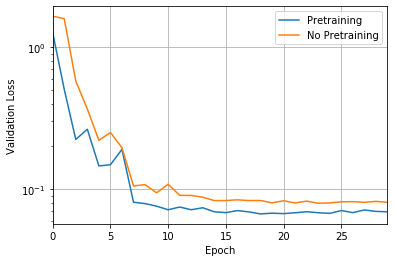

In [110]:
ax = plot_metric(df4, "eval_loss", experiment_names4, 
                 plot_kwargs=dict(logy=True, grid=True))
ax.set_xlabel("Epoch")
ax.set_ylabel("Validation Loss")

Clear overfitting after 7th epoch.  
Interestingly, smaller model seems more prone to overfitting.

Text(0, 0.5, 'Training Loss')

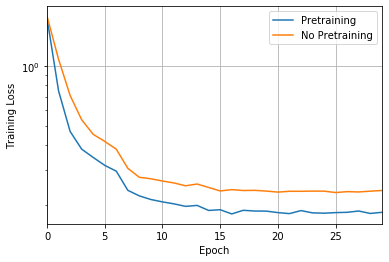

In [111]:
ax = plot_metric(df4, "train_loss", experiment_names4, 
                 plot_kwargs=dict(logy=True, grid=True))
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Loss")

## End results after convergence

In [113]:
best_epochs4 = []
eval_accuracies4 = pd.DataFrame()
for i,e in enumerate(experiment_names4):
    idx_max = df4[f"{i}_eval_a"].idxmax()
    best_epochs4.append(idx_max)
    eval_accuracies4[e] = [df4[f"{i}_eval_a"][idx_max]]
eval_accuracies4

,Pretraining,No Pretraining
0,0.982624,0.975634


In [114]:
columns4 = []
for i,e in enumerate(experiment_names4):
    for m, metric_name in zip(["p", "r", "f"], ["precision", "recall", "f1-score"]):
        columns4.append((e, metric_name))
        
mi_columns4 = pd.MultiIndex.from_tuples(columns4, names=['model', 'Metric'])
eval_class_prf4 = pd.DataFrame(columns=mi_columns4)
for i,e in enumerate(experiment_names4):
    for m, metric_name in zip(["p", "r", "f"], ["precision", "recall", "f1-score"]):
        eval_class_prf4[e, metric_name] = [df4[f"{i}_eval_{digit}_{m}"][best_epochs4[i]] for digit in range(10)]
eval_class_prf4
    

model  Pretraining                     No Pretraining                    
Metric   precision    recall  f1-score      precision    recall  f1-score
0         0.800000  0.800000  0.800000       0.000000  0.000000  0.000000
1         0.976744  0.976744  0.976744       0.857143  0.976744  0.913043
2         0.953271  0.990291  0.971429       0.902655  0.990291  0.944444
3         0.974619  0.960000  0.967254       0.965000  0.965000  0.965000
4         0.974843  0.974843  0.974843       0.948171  0.977987  0.962848
5         0.980907  0.971631  0.976247       0.962353  0.966903  0.964623
6         0.972843  0.983845  0.978313       0.969745  0.983845  0.976744
7         0.983070  0.981962  0.982516       0.977273  0.969560  0.973401
8         0.988701  0.987770  0.988235       0.990467  0.977422  0.983902
9         0.988839  0.987370  0.988104       0.988764  0.980684  0.984707